In [1]:
import pandas as pd
import vaex as vx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:

data_frame = vx.open("dataset/cleaned_2006.hdf5")

In [3]:
data_frame.head()

#,Date,ID,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year,Latitude,Longitude,Datetime,Day,Time,Month,District_Name
0,2015-09-05 13:30:00,10224738,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,No,Yes,924,9,61,2015,41.8151,-87.67,2015-09-05 13:30:00,Saturday,13:30:00,September,Deering
1,2015-09-04 11:30:00,10224739,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,No,No,1511,15,25,2015,41.8951,-87.7654,2015-09-04 11:30:00,Friday,11:30:00,September,Austin
2,2015-09-05 12:45:00,10224740,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,Yes,No,1412,14,21,2015,41.9374,-87.7166,2015-09-05 12:45:00,Saturday,12:45:00,September,Shakespeare
3,2015-09-05 13:00:00,10224741,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,No,Yes,1522,15,25,2015,41.8819,-87.7551,2015-09-05 13:00:00,Saturday,13:00:00,September,Austin
4,2015-09-05 10:55:00,10224742,082XX S LOOMIS BLVD,BURGLARY,FORCIBLE ENTRY,RESIDENCE,No,No,614,6,71,2015,41.7444,-87.6584,2015-09-05 10:55:00,Saturday,10:55:00,September,Gresham
5,2015-09-04 18:00:00,10224743,021XX W CHURCHILL ST,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,No,No,1434,14,24,2015,41.9146,-87.6816,2015-09-04 18:00:00,Friday,18:00:00,September,Shakespeare
6,2015-09-05 13:00:00,10224744,025XX W CERMAK RD,THEFT,RETAIL THEFT,GROCERY FOOD STORE,Yes,No,1034,10,31,2015,41.852,-87.6892,2015-09-05 13:00:00,Saturday,13:00:00,September,Ogden
7,2015-09-05 11:30:00,10224745,031XX W WASHINGTON BLVD,ROBBERY,STRONGARM - NO WEAPON,STREET,No,Yes,1222,12,27,2015,41.8828,-87.7043,2015-09-05 11:30:00,Saturday,11:30:00,September,Near West
8,2015-09-05 14:00:00,10224746,071XX S PULASKI RD,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),No,No,833,8,65,2015,41.7636,-87.7223,2015-09-05 14:00:00,Saturday,14:00:00,September,Chicago Lawn
9,2015-09-05 11:00:00,10224749,052XX N MILWAUKEE AVE,BATTERY,SIMPLE,SMALL RETAIL STORE,No,No,1623,16,11,2015,41.976,-87.768,2015-09-05 11:00:00,Saturday,11:00:00,September,Jefferson Park


Chart 1

In [42]:
crime_types = data_frame[['Primary Type']]

In [48]:
# get crime types
temp_data_frame = crime_types.groupby(crime_types["Primary Type"],
                                                  agg={'total_case': vx.agg.count('Primary Type')}, sort=True)
temp_data_frame = temp_data_frame.sort(
            ["total_case"], ascending=False)
temp_data_frame = temp_data_frame.head(15)
temp_data_frame = temp_data_frame.sort(
            ["total_case"], ascending=True)
temp_data_frame = temp_data_frame.to_pandas_df()
temp_data_frame.head()

,Primary Type,total_case
0,OFFENSE INVOLVING CHILDREN,36590
1,PROSTITUTION,37069
2,PUBLIC PEACE VIOLATION,38447
3,WEAPONS VIOLATION,74375
4,CRIMINAL TRESPASS,134073


In [46]:
import plotly.express as px

In [56]:
fig = px.bar(temp_data_frame, y="Primary Type", x="total_case", orientation="h", title="All Chicago Crimes by Type (2006-Present)")
fig.update_layout(title_x=0.5, height=600, width=800, xaxis_title="Crime Count", yaxis_title="Crime Type")
fig.show()

<module 'matplotlib.pyplot' from '/workspaces/diva536/.venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

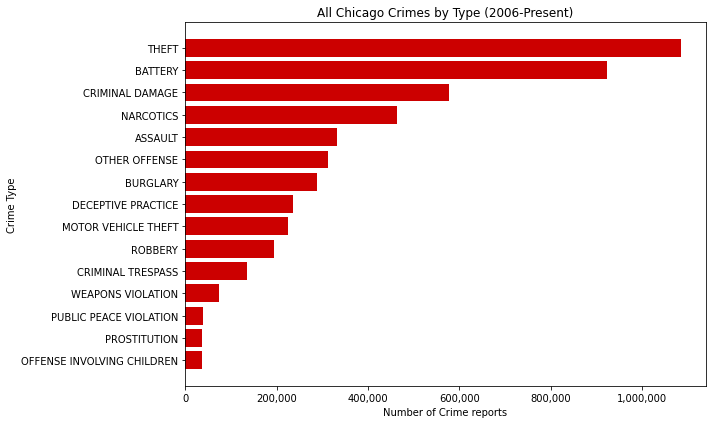

In [45]:

plt.figure(figsize=(10, 6))
plt.barh(temp_data_frame["Primary Type"], temp_data_frame['total_case'], color='#cc0000')
plt.title('All Chicago Crimes by Type (2006-Present)')
plt.xlabel('Number of Crime reports')
plt.ylabel('Crime Type')
plt.tight_layout()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt

In [44]:
fig = go.Figure([go.Bar(x=temp_data_frame["Primary Type"], y=temp_data_frame['total_case'], orientation='h')])
fig.show()

Chart 2

In [7]:
narcotics = data_frame[data_frame['Primary Type']=='NARCOTICS']
temp_data_frame = narcotics.groupby([narcotics["Primary Type"],narcotics["Description"]],
                                                  agg={'total_case': vx.agg.count('Primary Type')}, sort=True)
temp_data_frame = temp_data_frame.sort(
            ["total_case"], ascending=False)
temp_data_frame = temp_data_frame.head(15)
temp_data_frame = temp_data_frame.sort(
            ["total_case"], ascending=True)
temp_data_frame = temp_data_frame.to_pandas_df()
temp_data_frame.head()


,Primary Type,Description,total_case
0,NARCOTICS,POSS: HALLUCINOGENS,3545
1,NARCOTICS,POSS: SYNTHETIC DRUGS,3559
2,NARCOTICS,ATTEMPT POSSESSION NARCOTICS,6424
3,NARCOTICS,POSSESSION OF DRUG EQUIPMENT,6840
4,NARCOTICS,MANU/DEL:CANNABIS OVER 10 GMS,8526


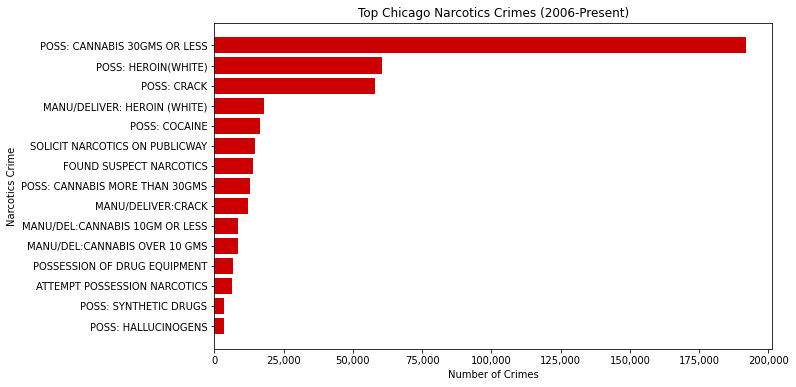

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(temp_data_frame["Description"], temp_data_frame['total_case'], color='#cc0000')
plt.title('Top Chicago Narcotics Crimes (2006-Present)')
plt.xlabel('Number of Crimes')
plt.ylabel('Narcotics Crime')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Chart 3

In [10]:
narcotics = data_frame[data_frame['Primary Type']=='OTHER OFFENSE']
temp_data_frame = narcotics.groupby([narcotics["Primary Type"],narcotics["Description"]],
                                                  agg={'total_case': vx.agg.count('Primary Type')}, sort=True)
temp_data_frame = temp_data_frame.sort(
            ["total_case"], ascending=False)
temp_data_frame = temp_data_frame.head(15)
temp_data_frame = temp_data_frame.sort(
            ["total_case"], ascending=True)
temp_data_frame = temp_data_frame.to_pandas_df()
temp_data_frame.head()


,Primary Type,Description,total_case
0,OTHER OFFENSE,ANIMAL ABUSE/NEGLECT,2256
1,OTHER OFFENSE,SEX OFFENDER: FAIL TO REGISTER,3069
2,OTHER OFFENSE,SEX OFFENDER: FAIL REG NEW ADD,3094
3,OTHER OFFENSE,PAROLE VIOLATION,5272
4,OTHER OFFENSE,OTHER CRIME INVOLVING PROPERTY,5598


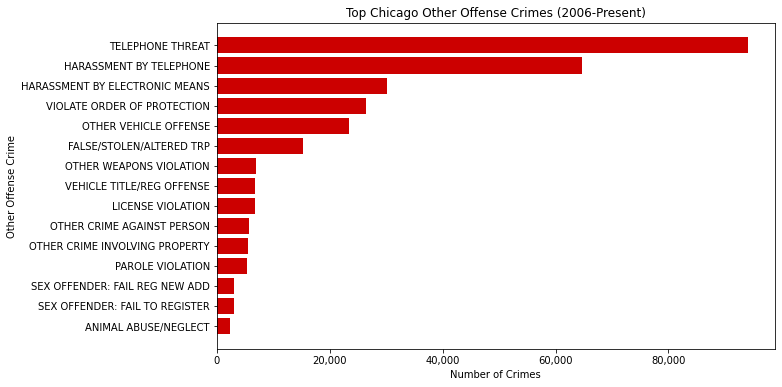

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(temp_data_frame["Description"], temp_data_frame['total_case'], color='#cc0000')
plt.title('Top Chicago Other Offense Crimes (2006-Present)')
plt.xlabel('Number of Crimes')
plt.ylabel('Other Offense Crime')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Chart 4

In [12]:
temp_data_frame = data_frame.groupby(data_frame["Day"],agg={'total_case': vx.agg.count('Day')}, sort=True)

temp_data_frame = temp_data_frame.sort(
            ["total_case"], ascending=True)
temp_data_frame = temp_data_frame.to_pandas_df()
temp_data_frame.head()

,Day,total_case
0,Sunday,693628
1,Monday,713427
2,Thursday,718113
3,Tuesday,719937
4,Wednesday,725643


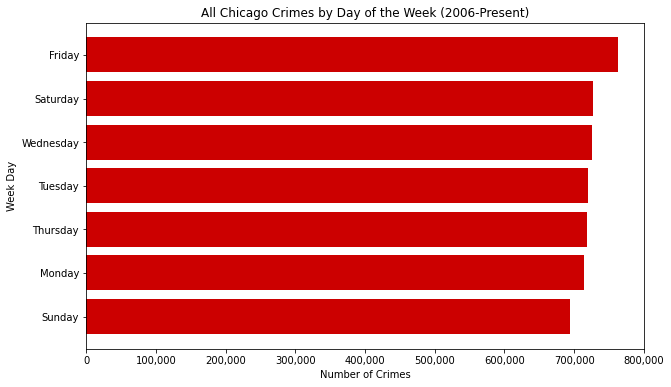

In [13]:
plt.figure(figsize=(10, 6))
plt.barh(temp_data_frame["Day"], temp_data_frame['total_case'], color='#cc0000')
plt.title('All Chicago Crimes by Day of the Week (2006-Present)')
plt.xlabel('Number of Crimes')
plt.ylabel('Week Day')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Chart 5

In [14]:
temp_data_frame = data_frame.groupby(data_frame["Month"],agg={'total_case': vx.agg.count('Month')}, sort=True)
temp_data_frame = temp_data_frame.sort(
            ["total_case"], ascending=True)
temp_data_frame = temp_data_frame.to_pandas_df()
temp_data_frame.head()

,Month,total_case
0,February,347133
1,December,375570
2,November,394856
3,April,408189
4,January,411907


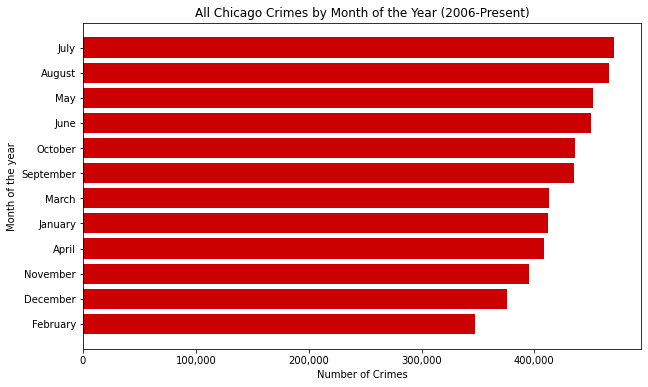

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(temp_data_frame["Month"], temp_data_frame['total_case'], color='#cc0000')
plt.title('All Chicago Crimes by Month of the Year (2006-Present)')
plt.xlabel('Number of Crimes')
plt.ylabel('Month of the year')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Chart 6

In [17]:
tdf = data_frame[["Primary Type","Date"]]
top_crimes = tdf[(tdf['Primary Type']=='THEFT') | \
                         (tdf['Primary Type']=='BATTERY') | \
                         (tdf['Primary Type']=='CRIMINAL DAMAGE') | \
                         (tdf['Primary Type']=='NARCOTICS') | \
                         (tdf['Primary Type']=='OTHER OFFENSE') | \
                         (tdf['Primary Type']=='ASSAULT') | \
                         (tdf['Primary Type']=='BURGLARY') | \
                         (tdf['Primary Type']=='MOTOR VEHICLE THEFT') | \
                         (tdf['Primary Type']=='ROBBERY') | \
                         (tdf['Primary Type']=='DECEPTIVE PRACTICE')]
top_crimes = top_crimes.to_pandas_df()
# temp_data_frame = top_crimes.groupby([top_crimes["Month"],top_crimes["Primary Type"]],agg={'total_case': vx.agg.count('Primary Type')}, sort=True)
# temp_data_frame = temp_data_frame.to_pandas_df()
# temp_data_frame.head()
crimes_groupby = top_crimes.groupby([pd.Grouper('Date'), 'Primary Type'])
# top_crime_data = crimes_groupby['Primary Type'].count().compute().rename('Count')
print(top_crime_data.head(10))

AttributeError: 'Series' object has no attribute 'compute'

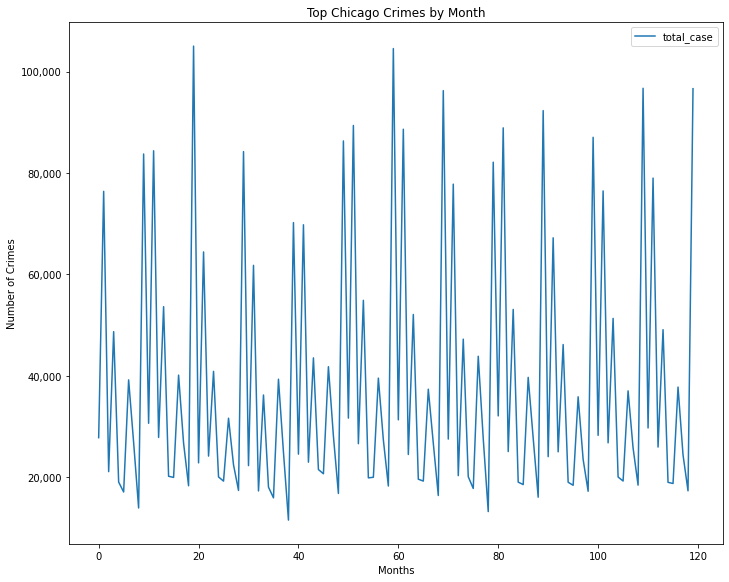

In [ ]:
temp_data_frame.plot(figsize=(10,8), cmap='tab10')
plt.legend(loc='upper right', frameon=True)
plt.title('Top Chicago Crimes by Month')
plt.tight_layout()
plt.xlabel('Months')
plt.ylabel('Number of Crimes')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Chart 7

In [20]:
temp_data_frame = data_frame.groupby(data_frame["Location Description"],agg={'total_case': vx.agg.count('Month')}, sort=True)
temp_data_frame = temp_data_frame.sort(
            ["total_case"], ascending=False)
temp_data_frame = temp_data_frame.head(15)
temp_data_frame = temp_data_frame.sort(
            ["total_case"], ascending=True)
temp_data_frame = temp_data_frame.to_pandas_df()
temp_data_frame.head()

,Location Description,total_case
0,DEPARTMENT STORE,67394
1,RESIDENTIAL YARD (FRONT/BACK),70464
2,RESIDENCE PORCH/HALLWAY,80990
3,RESIDENCE-GARAGE,86895
4,VEHICLE NON-COMMERCIAL,87197


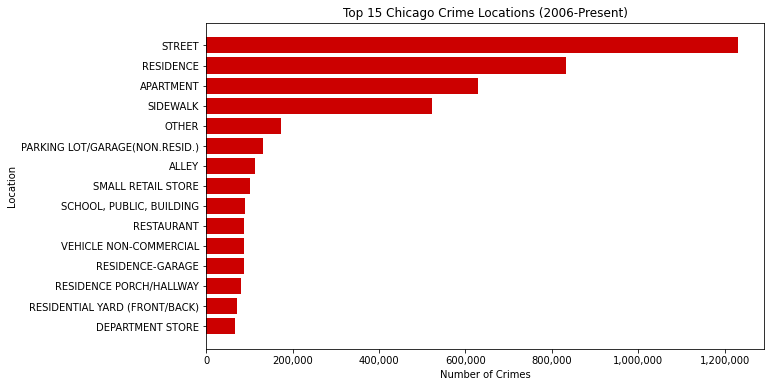

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(temp_data_frame["Location Description"], temp_data_frame['total_case'], color='#cc0000')
plt.title('Top 15 Chicago Crime Locations (2006-Present)')
plt.xlabel('Number of Crimes')
plt.ylabel('Location')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Chart 8

In [25]:
temp_data_frame = data_frame[data_frame["Primary Type"]=='PROSTITUTION']
temp_data_frame = temp_data_frame.groupby(temp_data_frame["Location Description"],agg={'total_case': vx.agg.count('Location Description')}, sort=True)
temp_data_frame = temp_data_frame.sort(
            ["total_case"], ascending=False)
temp_data_frame = temp_data_frame.head(15)
temp_data_frame = temp_data_frame.sort(
            ["total_case"], ascending=True)
temp_data_frame = temp_data_frame.to_pandas_df()
temp_data_frame.head()

,Location Description,total_case
0,FOREST PRESERVE,15
1,RESTAURANT,19
2,RESIDENCE PORCH/HALLWAY,30
3,COMMERCIAL / BUSINESS OFFICE,48
4,GAS STATION,59


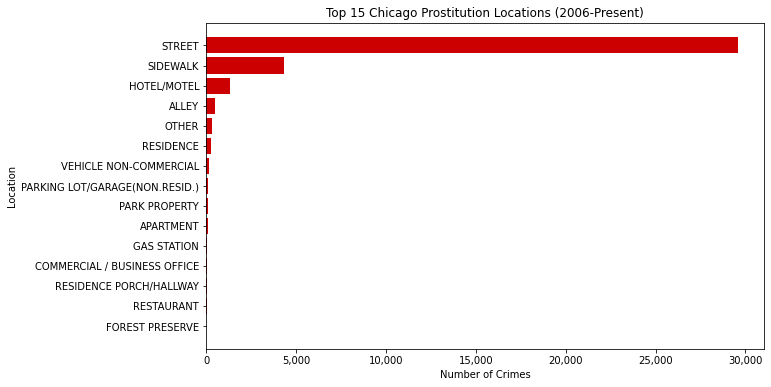

In [26]:
plt.figure(figsize=(10, 6))
plt.barh(temp_data_frame["Location Description"], temp_data_frame['total_case'], color='#cc0000')
plt.title('Top 15 Chicago Prostitution Locations (2006-Present)')
plt.xlabel('Number of Crimes')
plt.ylabel('Location')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Chart 8

In [27]:
temp_data_frame = data_frame[data_frame["Primary Type"]=='PROSTITUTION']
temp_data_frame = temp_data_frame.groupby(temp_data_frame["Year"],agg={'total_case': vx.agg.count('Year')}, sort=True)
temp_data_frame = temp_data_frame.to_pandas_df()
temp_data_frame.head()

,Year,total_case
0,2006,6955
1,2007,6083
2,2008,5088
3,2009,3900
4,2010,2484


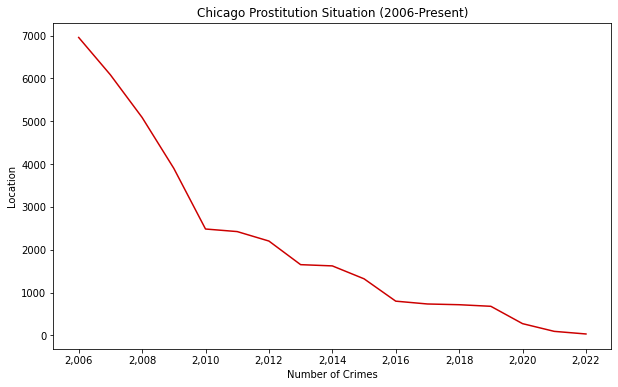

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(temp_data_frame["Year"], temp_data_frame['total_case'], color='#cc0000')
plt.title('Chicago Prostitution Situation (2006-Present)')
plt.xlabel('Number of Crimes')
plt.ylabel('Location')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Chart 9

In [33]:
temp_data_frame = data_frame[(data_frame["Primary Type"]=='BOOKMAKING') | (data_frame["Primary Type"]=='GAME/AMUSEMENT DEVICES') | (data_frame['Primary Type']=='GAMBLING') | (data_frame['Primary Type']=='GAME/CARDS') | (data_frame['Primary Type']=='GAME/DICE') | (data_frame['Primary Type']=='GAME/OTHER GAMBLING') | (data_frame['Primary Type']=='LOTTERY')]
temp_data_frame = temp_data_frame.groupby([temp_data_frame["Primary Type"],temp_data_frame["Year"]],agg={'total_case': vx.agg.count('Primary Type')}, sort=True)
temp_data_frame = temp_data_frame.to_pandas_df()
temp_data_frame.head()

,Primary Type,Year,total_case
0,GAMBLING,2006,1357
1,GAMBLING,2007,1409
2,GAMBLING,2008,1178
3,GAMBLING,2009,963
4,GAMBLING,2010,927


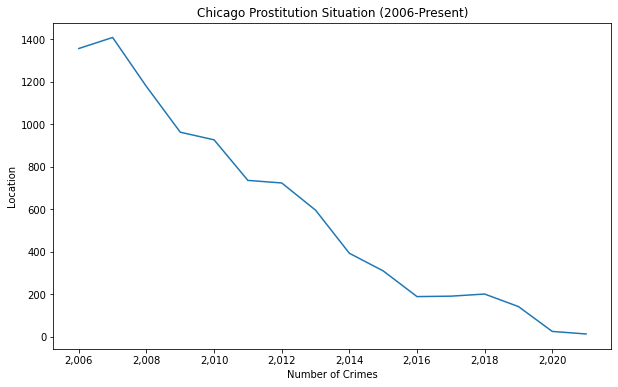

In [39]:
plt.figure(figsize=(10, 6))
crime_list = temp_data_frame["Primary Type"].unique()
for i in crime_list:
    plt.plot(temp_data_frame["Year"], temp_data_frame[temp_data_frame["Primary Type"]==i]['total_case'])
plt.title('Chicago Prostitution Situation (2006-Present)')
plt.xlabel('Number of Crimes')
plt.ylabel('Location')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()